In [1]:
!wget https://github.com/opencv/opencv_zoo/raw/master/models/face_detection_yunet/face_detection_yunet_2022mar.onnx
!wget https://i.ibb.co/8MTB6wg/Screenshot-101.png

--2022-12-15 23:48:11--  https://github.com/opencv/opencv_zoo/raw/master/models/face_detection_yunet/face_detection_yunet_2022mar.onnx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/opencv/opencv_zoo/master/models/face_detection_yunet/face_detection_yunet_2022mar.onnx [following]
--2022-12-15 23:48:11--  https://media.githubusercontent.com/media/opencv/opencv_zoo/master/models/face_detection_yunet/face_detection_yunet_2022mar.onnx
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 345478 (337K) [application/octet-stream]
Saving to: ‘face_detection_yunet_2022mar.onnx.5’

face_detect

In [7]:
import cv2 as cv
import numpy as np
from cropp_image import YUNET_CROP
from google.colab.patches import cv2_imshow
draw_image_function = cv2_imshow

font = cv.FONT_HERSHEY_SIMPLEX
threshold = 0.5

In [3]:
model = None

def predict_with_model(model, img):
    """TODO"""
    return None,  [[0,np.random.rand()]]
# _, proba = predict_with_model(model, img)

In [4]:
crop_model = YUNET_CROP(padding = (5,5))

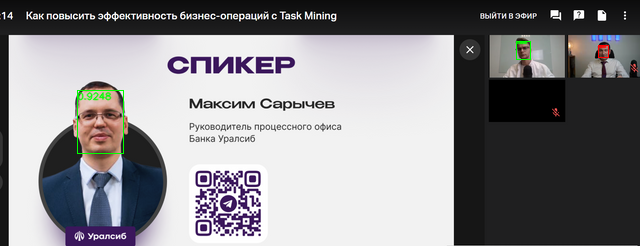

In [44]:
img = cv.imread("Screenshot-101.png")
borders, imgs = crop_model.crop(img)

print_img = img.copy()
for ccords, croped_img in zip(borders, imgs):
    bbox = ccords[0:4].astype(np.int32)

    _, proba = predict_with_model(model, croped_img)
    proba = proba[0][1]

    

    color = (0,255,0) if proba > 0.5 else (0,0,255)
    cv.putText(print_img, "{:1.4f}".format(proba) ,(bbox[0], int(bbox[1] + bbox[2] / 5)), 
               font, bbox[2] / 150,color,1,cv.LINE_AA)
    cv.rectangle(print_img, (bbox[0], bbox[1]), (bbox[0]+bbox[2], bbox[1]+bbox[3]), color, 1)
    
draw_image_function(print_img)

0.8264591778836866


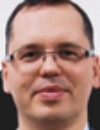

0.6693343987264269


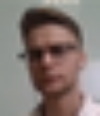

0.2355083466532356


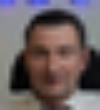

In [48]:
img = cv.imread("Screenshot-101.png")
borders, imgs = crop_model.crop(img)

print_img = img.copy()
for ccords, croped_img in zip(borders, imgs):
    _, proba = predict_with_model(model, croped_img)
    proba = proba[0][1]

    print(proba)
    draw_image_function(cv.resize(croped_img, (100, int(croped_img.shape[0] / croped_img.shape[1] * 100))))